In [538]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
#sns.set_theme() 

from sklearn.decomposition import PCA

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [593]:
df = pd.read_csv('people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head() # вывод 5 первых элементов df

Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# <b>1. Изучение датасета (5 баллов)</b>
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [540]:
# Посмотрим на датасет в целом
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           6000 non-null   int64  
 1   was_married  6000 non-null   int64  
 2   childrens    6000 non-null   float64
 3   salary       6000 non-null   float64
 4   sex          6000 non-null   int64  
 5   age          6000 non-null   float64
 6   profession   6000 non-null   object 
 7   home_cost    6000 non-null   float64
 8   drive_info   3230 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 468.8+ KB



# Признаки по типам


<b>Количественные данные - данные, значения которых имеют математическую значимость. </b>

Дискретные количественные признаки в df:
- 'childrens' - количество детей
- 'age' - возраст

Непрерывные количественные признаки в df:
- 'home_cost' - стоимость жилья
- 'salary' - уровень зарплаты

*Как я поняла под численными подразумеваются количественные

<b>Качественные признаки - признаки, значения которых определяют какое-либо свойство, а не конкретное числовое значение </b>

Номинальные качественные признаки:
- 'professon' - профессия
<p>
- 'was_married' - был ли женат/замужем 
- 'sex' - пол
<p>В данном случае 'was_married' и 'sex' можно назвать бинарными, так как только 2 "качественных состояния" принимают признаки.
Но 'was_married' и 'sex' все же имеют численные значения, в отличии от 'professon'.

Порядковых качественных величин в df нет. Порядковые можно сравнить между собой. А по выбранным 3 признакм никак нельзя сравнивать их значения. 



In [541]:
# Выведет уникальные значения бинарных признаков для подтверждения
print(df.was_married.drop_duplicates())
print(df.sex.drop_duplicates())

0    1
3    0
Name: was_married, dtype: int64
0    1
3    0
Name: sex, dtype: int64


<b>Бесполезными признакими можно считать:</b>
- 'id' - так как он по сути только нумерует записи (строки);
- 'drive_info' - есть ли водительские права. Так как значения данного параметра имеет только половина записей. То есть не информативный признак. Что уже было видно в самом перевом выводе информации о датасете.

In [542]:
# Выведем количество значений и их процент признака drive_info 
# count_drive_info - процент значений от общего количества записей
count_drive_info = round((df.drive_info.count() * 100 / df.shape[0]), 2)
print('drive_info: {} - {}%'.format(df.drive_info.count(), count_drive_info))

drive_info: 3230 - 53.83%


# Сравнение на нормальное распределение 

In [543]:
# 'profession' имеет не численные значения, и так просто отрисовать его не получится. Но можно это сделать plotly.express 
px.histogram(df[["profession"]],
             nbins=35,
             width=600,
             title="Гистограмма распределения профессий")

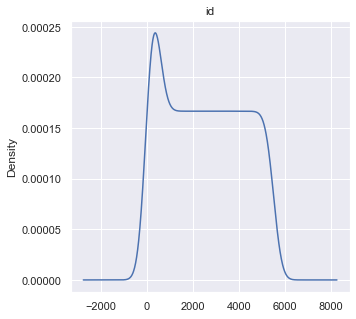

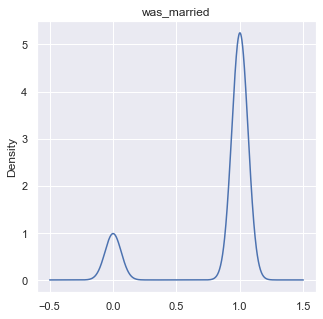

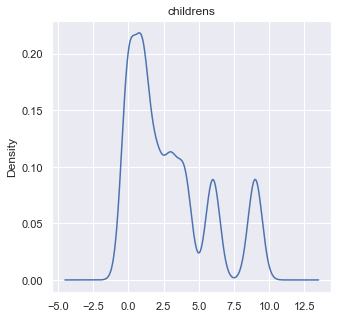

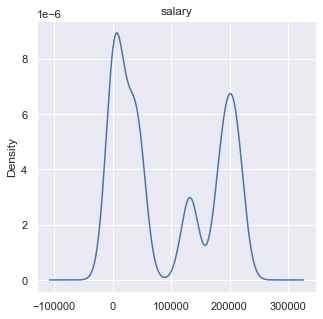

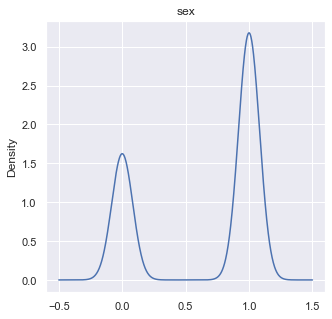

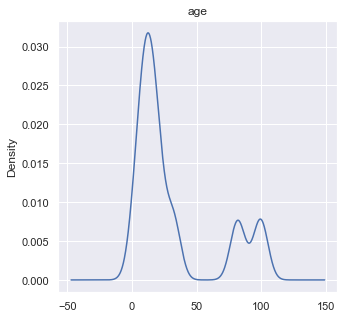

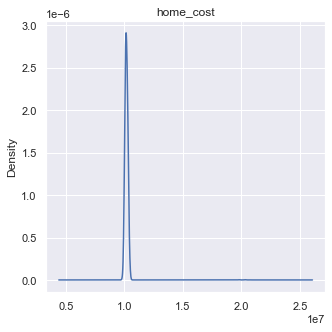

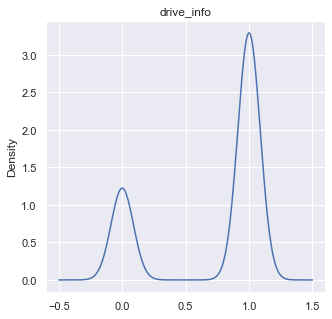

In [544]:
# А остальные отрисуем попроще (через ядерную оценку плотности веротности признаков)
colums_df = ['id', 'was_married', 'childrens', 'salary', 'sex', 'age', 'home_cost', 'drive_info']
for i in colums_df:
    plt.figure()
    df[i].plot(kind='kde', title = i, figsize = (5,5))


<b>Вывод из анализа выведенных графиков</b>
<p>Похожее на нормальное распределение имеет только признак `home_cost`
<p>Признак `id` должен иметь равномерное распределение. То, что мы увидели, может говорить о возможных повторениях (дулях)

# <b>2. Чистка датасета (5 баллов)</b>
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

# Дубли

<p> Из ядерной оценки плотности вероятности 'id' видно, что в начальных значений больше.
<p> Проверим количество уникальных записей. 

In [545]:
df_less_duplicates = df.drop_duplicates()   # сщхранит изменения в f_less_duplicates
df_less_duplicates.shape

(5500, 9)

In [546]:
df.iloc[0:5, :]

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


In [547]:
df.iloc[5500:5505, :]

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
5500,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
5501,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
5502,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
5503,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
5504,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


Видно, что первые 500 записей и последние (с 5500 до 6000) повторяются.

Значит, можем спокойно удалить последние 500.

Удалим и `обновим на df_new` (чтоб не писать длинное название).

In [548]:
df_new = df_less_duplicates

# Пропуски
Пропуски есть только у признака `drive_info`. Это следовало из общего представления о датасете (df.info()).


In [549]:
# Выведем процент пустых значений признака drive_info для df_new
count_drive_info = 100 - round((df_new.drive_info.count() * 100 / df_new.shape[0]), 2)
print(f'drive_info = NaN: {count_drive_info}%')

# Удаляем признак (так как больше 40% пропусков)
cols_to_drop = ['drive_info']
df_less_drive_info = df_new.drop(cols_to_drop, axis=1) # axis = 1 - по названию столбца


drive_info = NaN: 45.89%


In [550]:
# "Обновим" датасет
df_new = df_less_drive_info
df_new.shape

(5500, 8)

# Выбросы

На гистограмме `home_cost` уже было видно, что признак скорее всего имеет выбросы. 

Визуализируем их более наглядно.

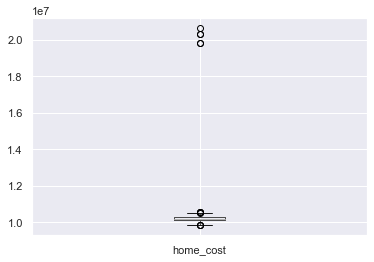

In [551]:
# На данном этапе df_new не имеет дублей и признака drive_info
df_new.boxplot(['home_cost']);

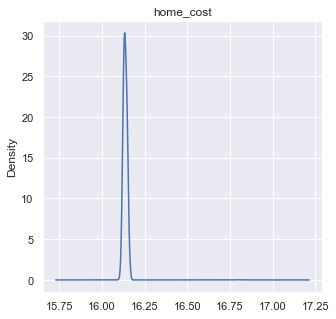

In [552]:
# Попробуем прологарифмировать
np.log(df_new['home_cost']).plot(kind='kde', title = 'home_cost', figsize = (5,5));

<b>Логарифмирование не помогло. Тогда будем пробовать другой метод.</b>
<p><b>Не удалим, а заменим выбросы.</b>
<p>Метод `clip` заменяет значения большие (меньшие) на максимальное (минимальное) значение выбранного диапазона. То есть мы не удалим, а заменим наши выбросы на значение квантили.

Количество выбросов:  15


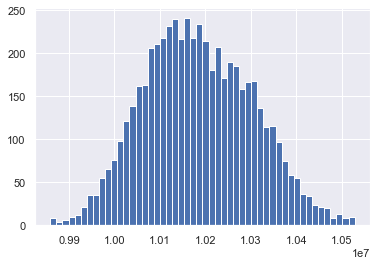

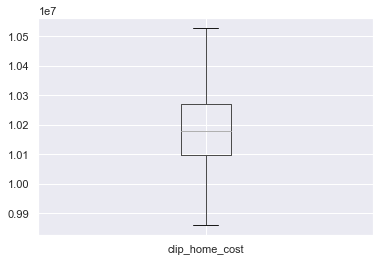

In [591]:
# Определим границы
q_up = np.quantile(df_new['home_cost'], 0.9985) # квантиль с вероятностью 0.999 - наше максимльное значение
q_down = np.quantile(df_new['home_cost'], 0.001) # минимальное значение


# Подсчитаем количество выброосов
if_blowout = (df_new['home_cost'] > q_up) | (df_new['home_cost'] < q_down)
n_blowout = df_new.loc[if_blowout, 'home_cost'].count()
print("Количество выбросов: ", n_blowout)

df_new['clip_home_cost'] = np.clip(df_new['home_cost'], q_down, q_up) # заменяем
# Отрисовываем
df_new['clip_home_cost'].hist(bins=50)
plt.figure()
df_new.boxplot(['clip_home_cost']);

Нормальное распределение! Выбросов!
Обновим датасет (чтоб название его не становилось с каждым изменением длиннее)

In [555]:
# "Обновим" датасет
df_new['home_cost'] = df_new['clip_home_cost']
df_new = df_new.drop("clip_home_cost", axis=1)
df_new.shape

(5500, 8)

# Удаление еще одного бессмысленного признака
<p> Улалим признак `id`, так как он по сути лишь индексирует записи

In [556]:
df_new = df_new.drop("id", axis=1)
df_new.shape

(5500, 7)

# Вывод
- Были дубли (записи 0 - 500 и 5500 - 6000). Удалили.
- Пропуски были по признаку 'drive_info', процент которых составил 45.89%. Признак был удален.
- Выбросы были по признаку 'home_cost' (количество выбросов 12). 
- Удален признак 'id'.
- Все именения сохранены в датасете `df_new`

# <b>3. Изучение зависимых признаков (5 балла). </b>
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



In [557]:
# Матрица корреляций с коэффициентом Пирсона
corr_matrix_pearson = df_new.corr(method='pearson')  
corr_matrix_pearson

,was_married,childrens,salary,sex,age,home_cost
was_married,1.000000,0.242439,-0.500360,0.337564,0.200417,-0.339718
childrens,0.242439,1.000000,0.393879,0.385415,0.742417,0.281925
salary,-0.500360,0.393879,1.000000,0.244868,0.076125,0.704618
sex,0.337564,0.385415,0.244868,1.000000,0.340071,0.180985
age,0.200417,0.742417,0.076125,0.340071,1.000000,0.054372
home_cost,-0.339718,0.281925,0.704618,0.180985,0.054372,1.000000


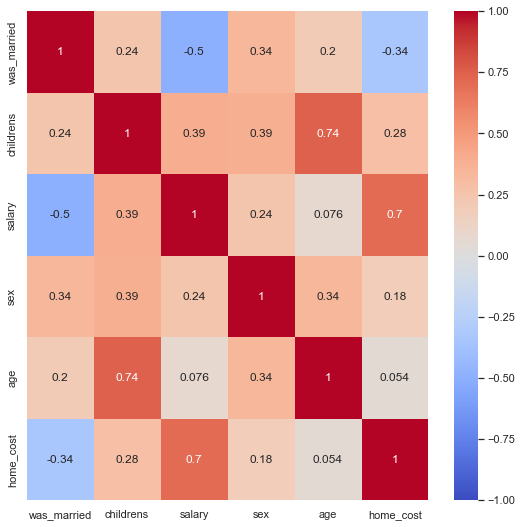

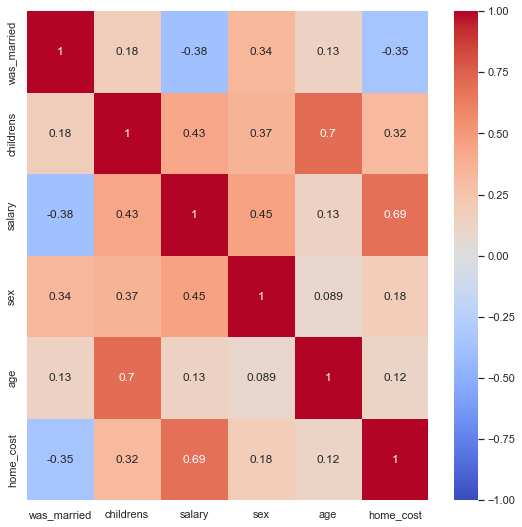

In [558]:
# Отобразим матрицу корелиций с коэффициентом Пирсона и Спирмана 
methods = ['pearson', 'spearman']
for i in methods:
    plt.figure(figsize=(9,9))
    sns.heatmap(df_new.corr(method=i),
                annot=True, 
                vmin=-1, vmax=1, center= 0,
                cmap="coolwarm");
    

<Figure size 936x1296 with 0 Axes>

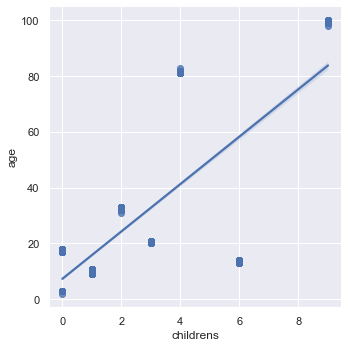

In [559]:
plt.figure(figsize=(13,18));
sns.lmplot(data=df_new, x='childrens', y = 'age');

В датасете 2 бинарных признака. Можно отрисовать зависимости с... 

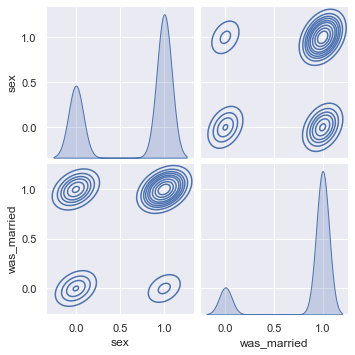

In [560]:
sns.pairplot(df_new[["sex",'was_married']], kind="kde")

<Figure size 720x1080 with 0 Axes>

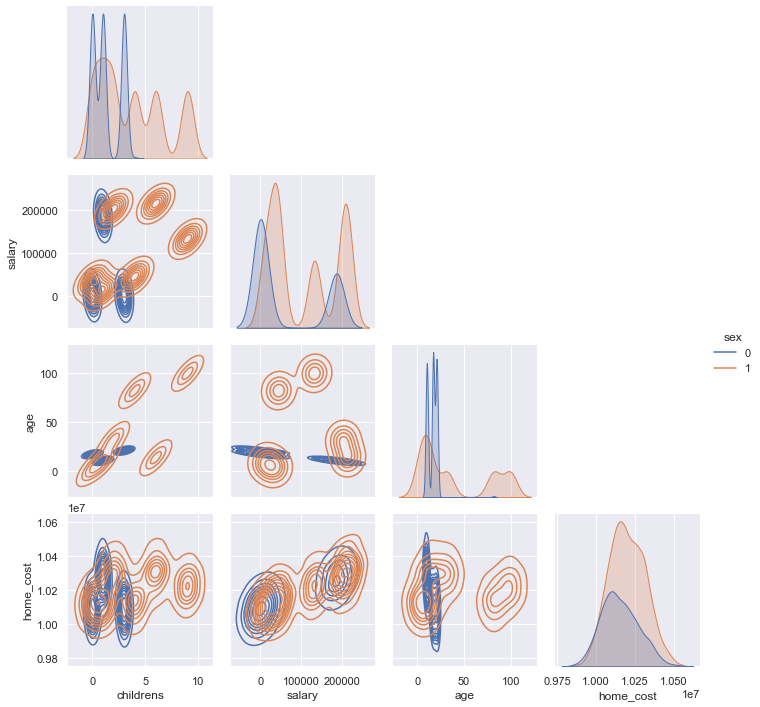

In [562]:
# Отрисуем поинтереснее
base_cols = ['childrens', 'salary', 'age', 'profession', 'home_cost']
plt.figure(figsize=(10,15))
sns.pairplot(df_new[base_cols + ["sex"]], kind='kde', hue='sex', corner=True);

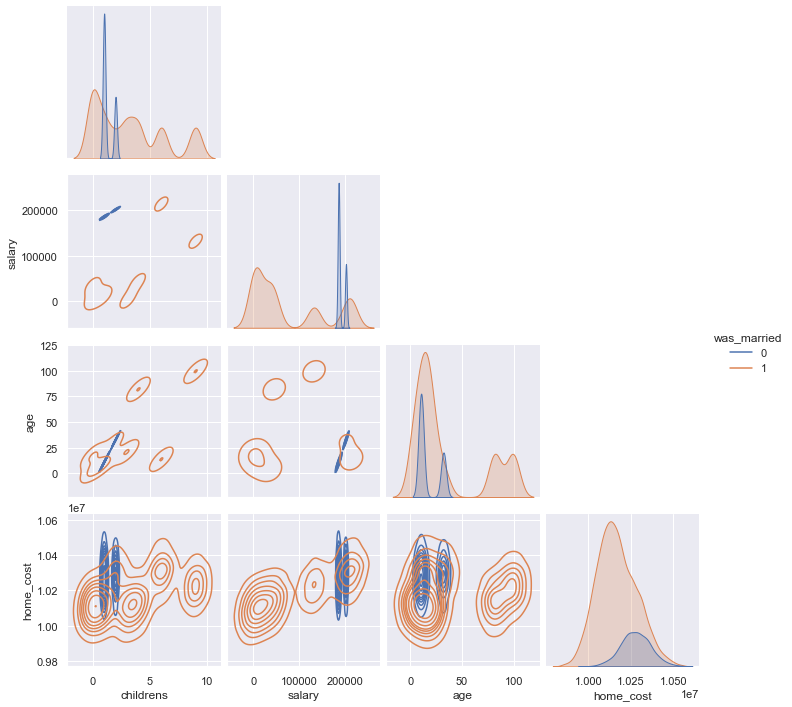

In [563]:
base_cols = ['childrens', 'salary', 'age', 'profession', 'home_cost']
sns.pairplot(df_less_drive_info[base_cols + ["was_married"]], kind='kde', hue='was_married', corner=True);

# <b>4. Нормировка признаков (3 балла)</b>
* Отнормировать данные
* Обосновать выбор нормировки

`ПРИЗНАКИ:`
- was_married (бинарный)
- childrens 
- salary
- sex (бинарный)
- age
- profession (категориальный не бинарный)
- home_cost

<p> *`professin` не включаем
<p> *бинарные признаки не нормируем (итак 0 и 1)

# Выбор метода нормировки
<b>StandardScaler</b>
<p>Используется приведение к стандартному виду (к нормальному распределению с М = 0 и D = 1).
Не все признаки имеют нормальное распределение. Поэтому такая нормализация может не дать хорошиий результат для некоторых признаков, не имеющих нормальное распределение.

<p><b>MinMaxScaler</b>
<p> В этом случаем как бы остается в рамках распределения признака. Остановимся на нем.


In [564]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [565]:
df_norm = df_new.copy(deep=True)

cols_norm = ['age', 'home_cost', 'salary'];

for i in range(0, len(cols_norm)):
    values = df_norm[cols_norm[i]].values
    values = values.reshape((len(values), 1))
    # Обучение
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)
    # Нормализация данных и вывод 5 значений
    normalized = scaler.transform(values)
    df_norm[cols_norm[i]] = normalized
    print(cols_norm[i])
    for i in range(0, 5):
        print(normalized[i])
    


age
[0.81632653]
[0.30612245]
[0.12244898]
[0.08163265]
[0.98979592]
home_cost
[0.26134347]
[0.41201759]
[0.83697268]
[0.2704057]
[0.52609879]
salary
[0.20313405]
[0.92724486]
[0.97869861]
[0.85199847]
[0.60462495]


In [566]:
df_norm = df_norm.drop("profession", axis=1);

# Вывод

Сохранили изменения в `df_norm`

# <b>5. Выделить кластеры (6 баллов)</b>
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

In [567]:
from sklearn.cluster import KMeans

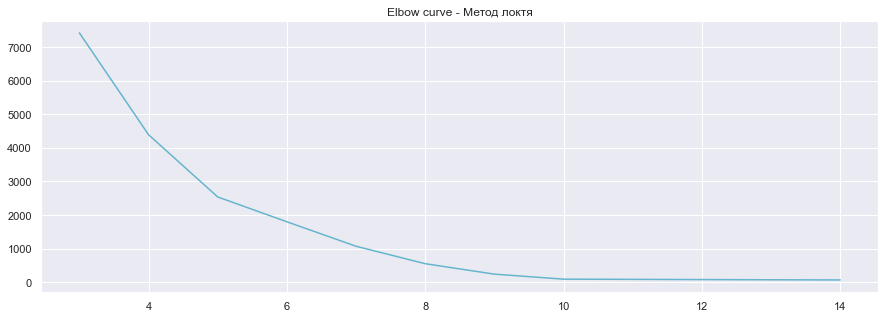

In [568]:
# после последних изменений датасет: df_norm
X = df_norm
improvements = []
min_range, max_range = 3, 15 # минимальное и максимальное количество кластеров, которые возьмем для поиска оптимального количества
for k in range(min_range, max_range):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(X)
    improvements.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(min_range, max_range), improvements, 'c')
plt.grid(True)
plt.title('Elbow curve - Метод локтя');

<b> Отклонения начинаются при 10 кластеров, но небольшое</b>
<p>Можно попробовать два варианта: 9 и 10

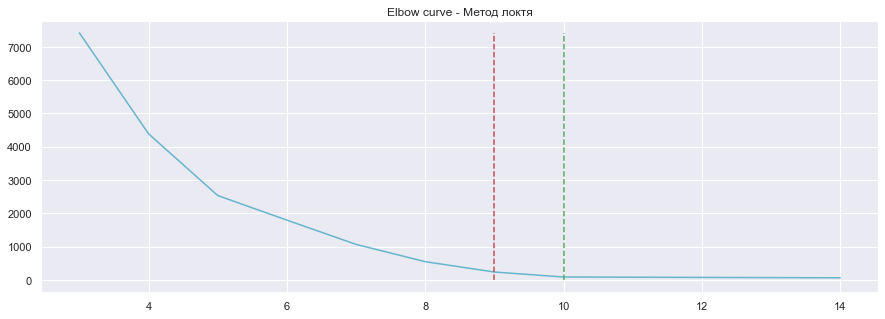

In [569]:
plt.figure(figsize=(15, 5))
plt.plot(range(min_range, max_range), improvements, 'c')
plt.grid(True)
plt.title('Elbow curve - Метод локтя');
y = [0, int(max(improvements))]
plt.plot([9, 9], y, '--r');
plt.plot([10, 10], y, '--g');

# Вывод
<p> Количество кластеров можно попробовать взять 9 и 10

# <b>6. Снизить размерность (6 баллов)</b>

Остановимся на методе `PCA` - методе главных компонент, как широко используемый способ понижения размерности.


In [570]:
from sklearn.decomposition import PCA
data_x_y = PCA(n_components=2, random_state=7).fit_transform(df_norm)

# <b>7. Нарисовать полученные кластеры (10 баллов)</b>

Кластеризация при n_clusters = 9
Количество кластеров: [0 1 2 3 4 5 6 7 8],
Количество элементов: [611 611 611 612 611 611 611 611 611]


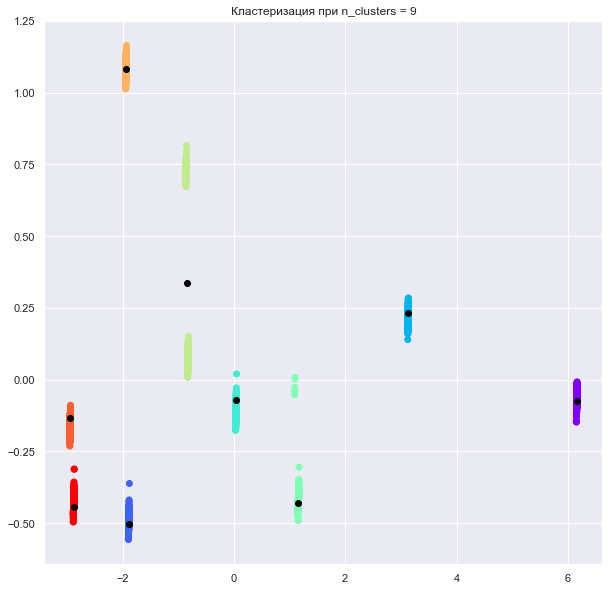

Кластеризация при n_clusters = 10
Количество кластеров: [0 1 2 3 4 5 6 7 8 9],
Количество элементов: [611 611 611 612 611 260 611 611 611 351]


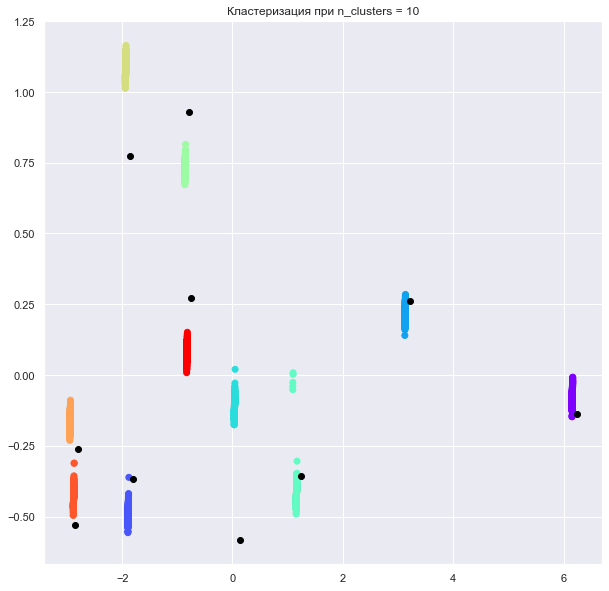

In [571]:
n_clusters = [9, 10]

for i in range(0, len(n_clusters)):
    clusterer = KMeans(n_clusters=n_clusters[i], random_state=7, max_iter=500)
    cluster_labels = clusterer.fit_predict(df_norm)
    print(f"Кластеризация при n_clusters = {n_clusters[i]}")

    print(f"Количество кластеров: {np.unique(cluster_labels, return_counts=True)[0]},\nКоличество элементов: {np.unique(cluster_labels, return_counts=True)[1]}")

    # Нормализуем центры кластеров 
    data_x_y_cluster_centers = PCA(n_components=2, random_state=7).fit_transform(clusterer.cluster_centers_)

    plt.figure(figsize=(10,10))
    plt.scatter(data_x_y[:,0], data_x_y[:,1], c=cluster_labels, cmap ='rainbow')
    plt.scatter(data_x_y_cluster_centers[:,0], data_x_y_cluster_centers[:,1], color='black')
    plt.title(f"Кластеризация при n_clusters = {n_clusters[i]}")
    plt.show()

In [452]:
df_new.profession.value_counts()

Homemaker        612
Engineer         611
Doctor           611
Entertainment    611
Lawyer           611
Artist           611
Marketing        611
Healthcare       611
Executive        611
Name: profession, dtype: int64

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**

# Вывод
<p> По полученной картинке видно, что кластеров все же 10.
<p> Кластеризация проходит по профессиям (при выборе 9 класстеров количество значений в каждом == количеству записей относительно каждой профессии). 
<p> Но одину профессию, делит на два кластера.

# Вывод
<p> По полученной картинке видно, что кластеров все же 10.
<p> Кластеризация проходит по профессиям (при выборе 9 класстеров количество значений в каждом == количеству записей относительно каждой профессии). 
<p> Но одину профессию, делит на два кластера.

# Вывод
<p> По полученной картинке видно, что кластеров все же 10.
<p> Кластеризация проходит по профессиям (при выборе 9 класстеров количество значений в каждом == количеству записей относительно каждой профессии). 
<p> Но одину профессию, делит на два кластера.